# Nov 10, 2021
Reading .dat file from Lucas

In [7]:
import math
import time
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.ticker import FormatStrFormatter

%matplotlib notebook

In [8]:
#Upload data as .dat file 

def dat_file_to_array(fileName, orbital):
    #fileName should be string of the full path and fileName
    #orbital is the choice of orbital, where total =0, s = 1, p = 2, d = 3.
    
    array = np.loadtxt(fileName)
    
    if np.shape(array)[1] > 2: #If we had to choose an orbital,
        array = [array[:,0],array[:,orbital]]
        
    else: #Transpose even if we don't have to choose an orbital to keep the formatting consistent.
        array = np.transpose(array)
        
    print("Shape of array: ",np.shape(array))
    
    return array

total_DOS = dat_file_to_array('/Users/jiabin/OneDrive/Projects/NbIrTe4/Processed_data_Level01/DFT1105/slab_shifted/total_dos.dat', 0)

Ir_DOS_d = dat_file_to_array('/Users/jiabin/OneDrive/Projects/NbIrTe4/Processed_data_Level01/DFT1105/slab_shifted/Ir_dos.dat', 3)

Nb_DOS_d = dat_file_to_array('/Users/jiabin/OneDrive/Projects/NbIrTe4/Processed_data_Level01/DFT1105/slab_shifted/Nb_dos.dat', 3)

Te_DOS_p = dat_file_to_array('/Users/jiabin/OneDrive/Projects/NbIrTe4/Processed_data_Level01/DFT1105/slab_shifted/Te_dos.dat', 2)


Shape of array:  (2, 5001)
Shape of array:  (2, 5001)
Shape of array:  (2, 5001)
Shape of array:  (2, 5001)


<IPython.core.display.Javascript object>


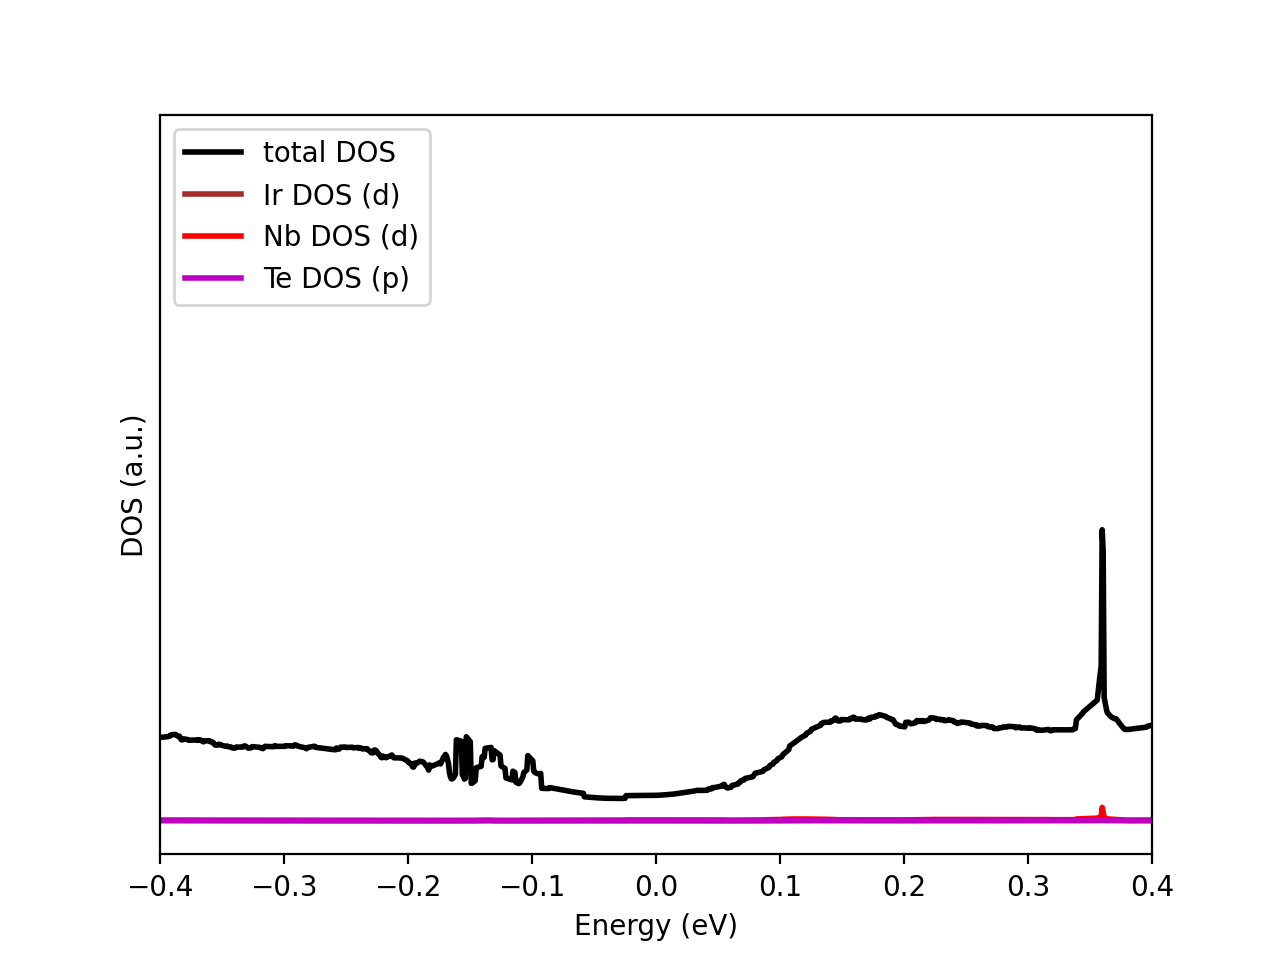

In [10]:
def DOS_Plot(data, x_range, labels, colours):
    #data: all DOS data to be plotted together in shape [a, b, c] where a is number of plots, b is number of columns
    #for each plot, c is number of rows for each plot
    #xRange: energy range on x axis to be plotted
    #labels: labels for each data set for legend
    #colours: array of colours for the data sets to be assigned
    
    #y_lim_index = (np.abs(data[0][0] - x_range[1])).argmin() #finding index closest to max x_range value

    #Plotting
    fig,(ax) = plt.subplots()
    fig.subplots_adjust(hspace=0.3)
    
    ax.set_yticks([])
    ax.set_xlim(x_range[0], x_range[1])
    #ax.set_ylim(0,data[0][1][y_lim_index]) #data[0][1][614] is the value of total DOS at 0.5 eV
    ax.set_ylabel("DOS (a.u.)")
    ax.set_xlabel("Energy (eV)")
    
    for i in range(np.shape(data)[0]):
        energy = data[i][0]
        DOS = data[i][1]
        ax.plot(energy,DOS,label=labels[i], marker='',linestyle='-', lw=2, color=colours[i])
        #lw=linewidth, 

    ax.legend(loc='upper left')
    plt.show()
    
    

data = [total_DOS, Ir_DOS_d, Nb_DOS_d, Te_DOS_p]
x_range = [-0.4, 0.4]
labels = ['total DOS','Ir DOS (d)', 'Nb DOS (d)', 'Te DOS (p)']
colours = ['k','brown','r','m']

DOS_Plot(data, x_range, labels, colours)